In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
os.listdir()

['.config', 'walmart_data.txt', 'sample_data']

In [ ]:
df = pd.read_csv('walmart_data.txt')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
175297,1003140,P00217142,F,26-35,4.0,C,1,0.0,1.0,11954.0
175298,1003140,P00119442,F,26-35,4.0,C,1,0.0,5.0,6882.0
175299,1003140,P00120742,F,26-35,4.0,C,1,0.0,8.0,4112.0
175300,1003140,P00183342,F,26-35,4.0,C,1,0.0,5.0,5397.0


In [ ]:
df.shape

(175302, 10)

In [ ]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
categorical_variables = df.columns[:-1]
numerical_variables = df.columns[-1:]

In [ ]:
## lets check if there are any missing values

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175302 entries, 0 to 175301
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     175302 non-null  int64  
 1   Product_ID                  175302 non-null  object 
 2   Gender                      175302 non-null  object 
 3   Age                         175301 non-null  object 
 4   Occupation                  175301 non-null  float64
 5   City_Category               175301 non-null  object 
 6   Stay_In_Current_City_Years  175301 non-null  object 
 7   Marital_Status              175301 non-null  float64
 8   Product_Category            175301 non-null  float64
 9   Purchase                    175301 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 13.4+ MB


In [ ]:
df.dropna(inplace = True) ## dropping missing values

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.753010e+05,175301.000000,175301.000000,175301.000000,175301.000000
mean,1.002858e+06,8.082789,0.409673,5.293181,9312.438737
std,1.719723e+03,6.528301,0.491775,3.740725,4977.884241
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001369e+06,2.000000,0.000000,1.000000,5854.000000
50%,1.002778e+06,7.000000,0.000000,5.000000,8056.000000
75%,1.004303e+06,14.000000,1.000000,8.000000,12060.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df[categorical_variables].describe()

,User_ID,Occupation,Marital_Status,Product_Category
count,1.753010e+05,175301.000000,175301.000000,175301.000000
mean,1.002858e+06,8.082789,0.409673,5.293181
std,1.719723e+03,6.528301,0.491775,3.740725
min,1.000001e+06,0.000000,0.000000,1.000000
25%,1.001369e+06,2.000000,0.000000,1.000000
50%,1.002778e+06,7.000000,0.000000,5.000000
75%,1.004303e+06,14.000000,1.000000,8.000000
max,1.006040e+06,20.000000,1.000000,18.000000


In [ ]:
df[numerical_variables].describe()

,Purchase
count,175301.000000
mean,9312.438737
std,4977.884241
min,185.000000
25%,5854.000000
50%,8056.000000
75%,12060.000000
max,23961.000000


In [ ]:
df.nunique()

User_ID                        5885
Product_ID                     3448
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 18
Purchase                      15442
dtype: int64

#### There are 3574 different products in the data
#### There are 5891 unique users who have maded purchase on Black Friday

In [ ]:
df['Gender'].value_counts(normalize = True)

M    0.753641
F    0.246359
Name: Gender, dtype: float64

In [ ]:
df['Stay_In_Current_City_Years'].value_counts(normalize = True)

1     0.350295
2     0.185835
3     0.173194
4+    0.155578
0     0.135099
Name: Stay_In_Current_City_Years, dtype: float64

#### The majority ~ 53% of transactions are done by users who have stayed in the city for 1 or 2 years

In [ ]:
df['Product_Category'].value_counts(normalize = True)

5.0     0.276735
1.0     0.256410
8.0     0.209485
11.0    0.044946
2.0     0.044096
3.0     0.037359
6.0     0.036634
4.0     0.021723
16.0    0.017598
15.0    0.011534
13.0    0.010017
10.0    0.009355
12.0    0.007216
7.0     0.006766
18.0    0.005568
14.0    0.002715
17.0    0.001090
9.0     0.000753
Name: Product_Category, dtype: float64

#### finding the unique customers for each gender

In [ ]:
grouped_gender = df.groupby('Gender')[['User_ID']].nunique().rename({'User_ID': 'Unique_Customers'})
grouped_gender

,User_ID
Gender,
F,1664
M,4221


In [ ]:
df.groupby(['Gender'])['Purchase'].sum()

Gender
F    3.789992e+08
M    1.253481e+09
Name: Purchase, dtype: float64

#### these are the transactions made by each user by gender

#### lets try to answer as to how much revenue is generated by each user by gender

In [ ]:
(df.groupby(['Gender'])['Purchase'].sum()/ df.groupby(['Gender'])['Purchase'].sum().values.sum()) * 100

Gender
F    23.216162
M    76.783838
Name: Purchase, dtype: float64

#### The majority of revenue generation for Walmart is from Males ~ 76 % of total

In [ ]:
df.groupby(['Marital_Status'])['User_ID'].count()

Marital_Status
0.0    103485
1.0     71816
Name: User_ID, dtype: int64

In [ ]:
df.groupby(['Marital_Status'])['User_ID'].nunique()

Marital_Status
0.0    3413
1.0    2472
Name: User_ID, dtype: int64

In [ ]:
grouped_age = df.groupby(['Age'])[['User_ID']].nunique().reset_index()
grouped_age['% contribution'] = (grouped_age['User_ID']/ grouped_age['User_ID'].sum()) * 100
grouped_age

,Age,User_ID,% contribution
0,0-17,218,3.704333
1,18-25,1067,18.130841
2,26-35,2051,34.851317
3,36-45,1166,19.813084
4,46-50,530,9.005947
5,51-55,481,8.173322
6,55+,372,6.321155


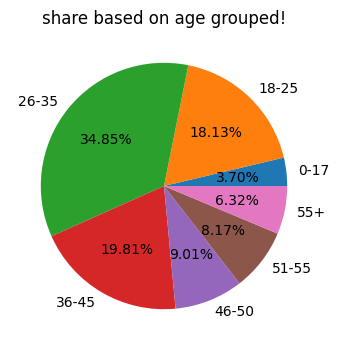

In [ ]:
plt.figure(figsize = (10,4))

plt.pie(x = grouped_age['% contribution'], labels = grouped_age['Age'], autopct = '%0.2f%%')
plt.title("share based on age grouped!")
plt.show()

In [ ]:
age_group_purch_df = df.groupby(['Age'])[['Purchase']].sum().reset_index()
age_group_purch_df['% contribution'] = (age_group_purch_df['Purchase'] / age_group_purch_df['Purchase'].sum()) * 100
age_group_purch_df

,Age,Purchase,% contribution
0,0-17,44671879.0,2.736443
1,18-25,297621040.0,18.231223
2,26-35,645450414.0,39.538033
3,36-45,328414351.0,20.117514
4,46-50,133160859.0,8.156968
5,51-55,118326654.0,7.248277
6,55+,64834626.0,3.971542


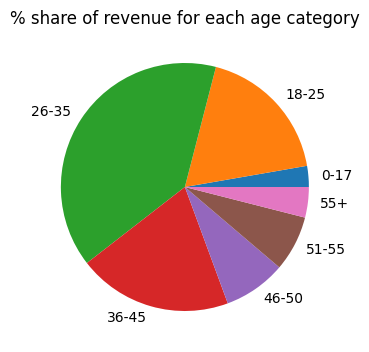

In [ ]:
plt.figure(figsize = (4,10))

plt.pie(x = age_group_purch_df['% contribution'], labels = age_group_purch_df['Age'])
plt.title("% share of revenue for each age category")
plt.show()

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
175296,1003140,P00323542,F,26-35,4.0,C,1,0.0,8.0,6085.0
175297,1003140,P00217142,F,26-35,4.0,C,1,0.0,1.0,11954.0
175298,1003140,P00119442,F,26-35,4.0,C,1,0.0,5.0,6882.0
175299,1003140,P00120742,F,26-35,4.0,C,1,0.0,8.0,4112.0


In [ ]:
product_grouped_purch = df.groupby(['Product_Category'])['Purchase'].sum().reset_index()
product_grouped_purch['% contribution'] = (product_grouped_purch['Purchase']/ product_grouped_purch['Purchase'].sum()) * 100
product_grouped_purch.sort_values('% contribution', ascending = False, inplace = True)

In [ ]:
top_10_prod_purch = product_grouped_purch.loc[product_grouped_purch.head(10).index]
top_10_prod_purch

,Product_Category,Purchase,% contribution
0,1.0,611351197.0,37.449234
4,5.0,301902754.0,18.493506
7,8.0,275100259.0,16.851679
5,6.0,102030595.0,6.250037
1,2.0,86766823.0,5.315032
2,3.0,66459609.0,4.071083
15,16.0,45683400.0,2.798405
10,11.0,36790358.0,2.253649
9,10.0,32296093.0,1.978346
14,15.0,29785020.0,1.824526


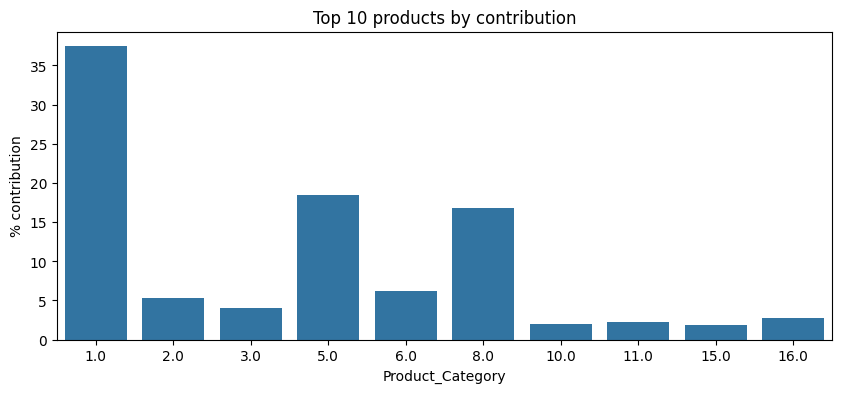

In [ ]:
plt.figure(figsize= (10,4))
plt.title("Top 10 products by contribution")
sns.barplot(data = top_10_prod_purch, y = top_10_prod_purch['% contribution'], x = top_10_prod_purch['Product_Category'])
plt.show()

#### product category 1 contributed most in terms of revenue on that black friday

## Univariate Analysis

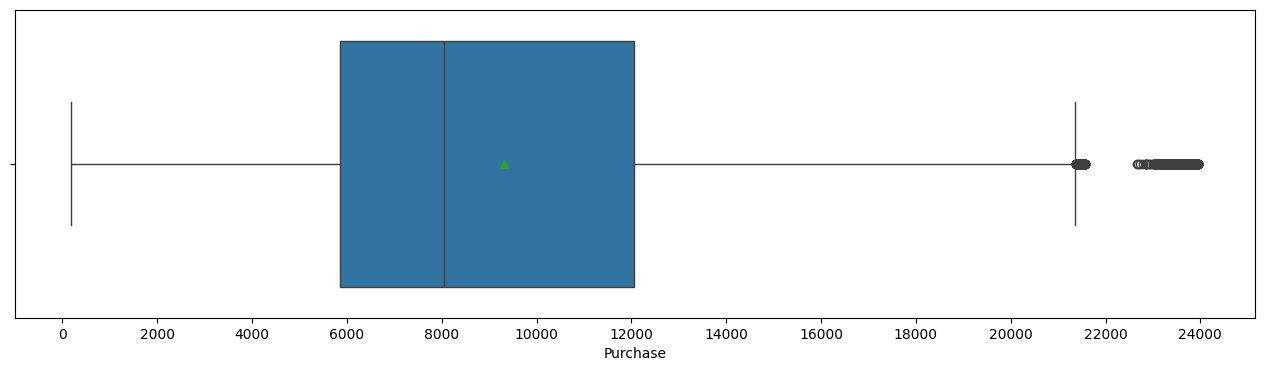

In [ ]:
plt.figure(figsize = (16,4))

sns.boxplot(data = df, x = 'Purchase', showmeans = True)
plt.xticks(np.arange(0,25000, 2000))
plt.show()


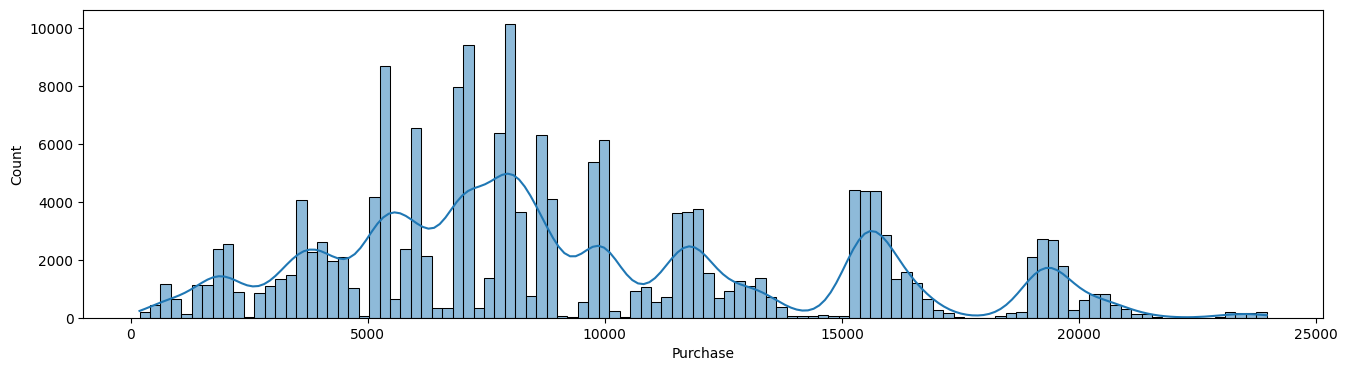

In [ ]:
plt.figure(figsize = (16,4))
sns.histplot(data = df, x = df['Purchase'], kde = True)
plt.show()

#### The transactions made by male and females separately

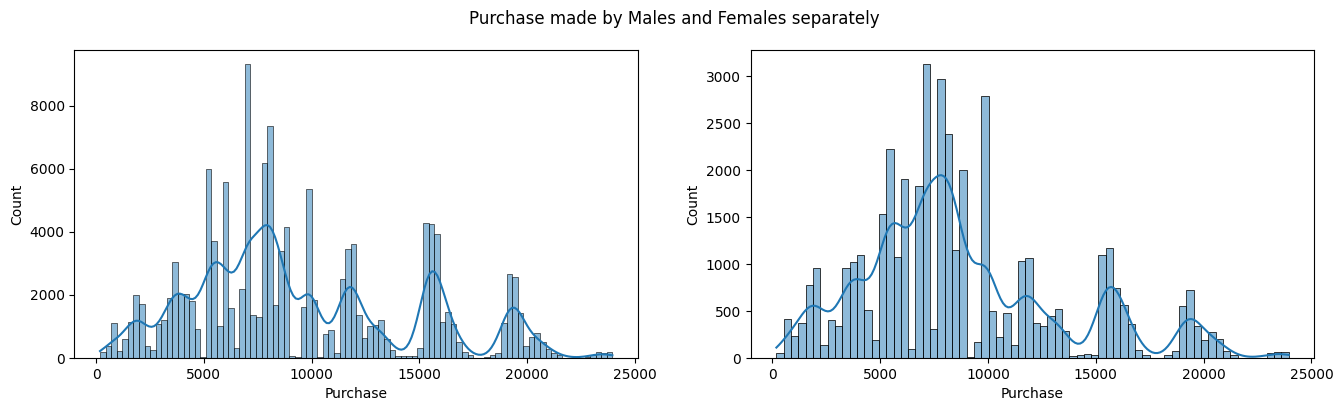

In [ ]:
plt.figure(figsize = (16,4))

plt.subplot(1,2,1)
sns.histplot(data = df[df['Gender'] == 'M'], x = 'Purchase', kde = True)
plt.subplot(1,2,2)
sns.histplot(data = df[df['Gender'] == 'F'], x = 'Purchase', kde = True)
plt.suptitle('Purchase made by Males and Females separately')
plt.show()


In [ ]:
grouped_g_uid = df.groupby(['Gender', 'User_ID'])[['Purchase']].sum().reset_index()
grouped_g_uid

,Gender,User_ID,Purchase
0,F,1000001,142437.0
1,F,1000006,154735.0
2,F,1000010,851500.0
3,F,1000011,134857.0
4,F,1000016,97524.0
...,...,...,...
5880,M,1006030,277591.0
5881,M,1006032,125448.0
5882,M,1006033,175099.0
5883,M,1006034,42886.0


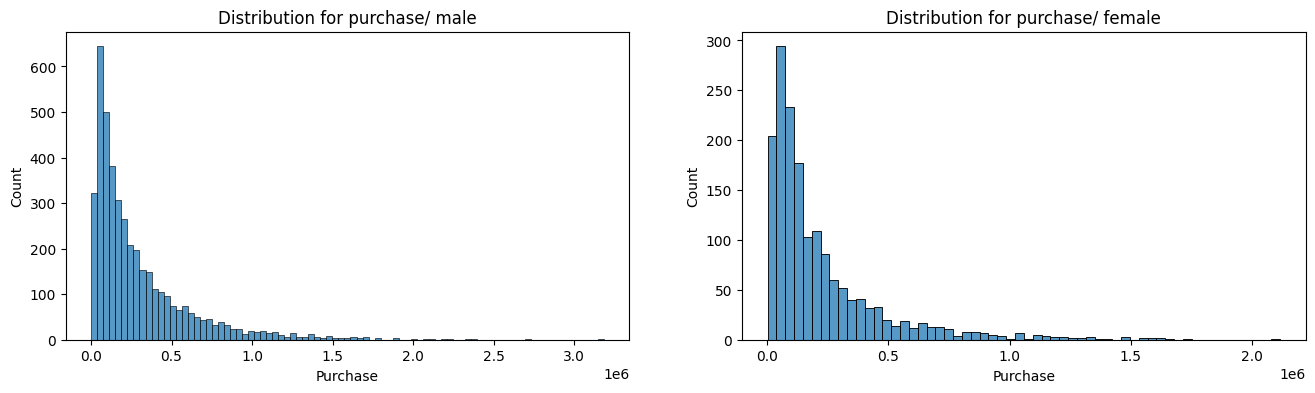

In [ ]:
plt.figure(figsize = (16, 4))
plt.subplot(1,2,1)
plt.title("Distribution for purchase/ male")
sns.histplot(data = grouped_g_uid[grouped_g_uid['Gender'] == 'M'], x = 'Purchase')
plt.subplot(1,2,2)
plt.title("Distribution for purchase/ female")
sns.histplot(data = grouped_g_uid[grouped_g_uid['Gender'] == 'F'], x = 'Purchase')
plt.show()

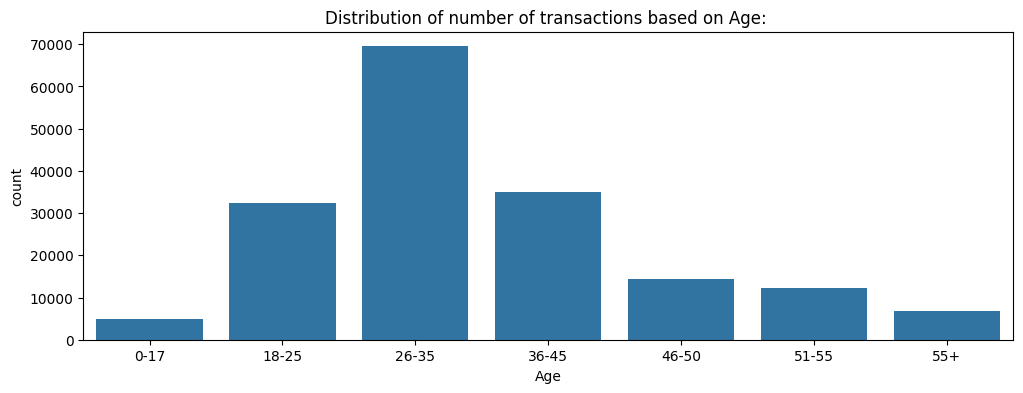

In [ ]:
plt.figure(figsize = (12,4))
plt.title("Distribution of number of transactions based on Age: ")
ord = df['Age'].unique()
ord.sort()
sns.countplot(data = df, x = 'Age', order = ord)
plt.show()

#### product category count and by purchase

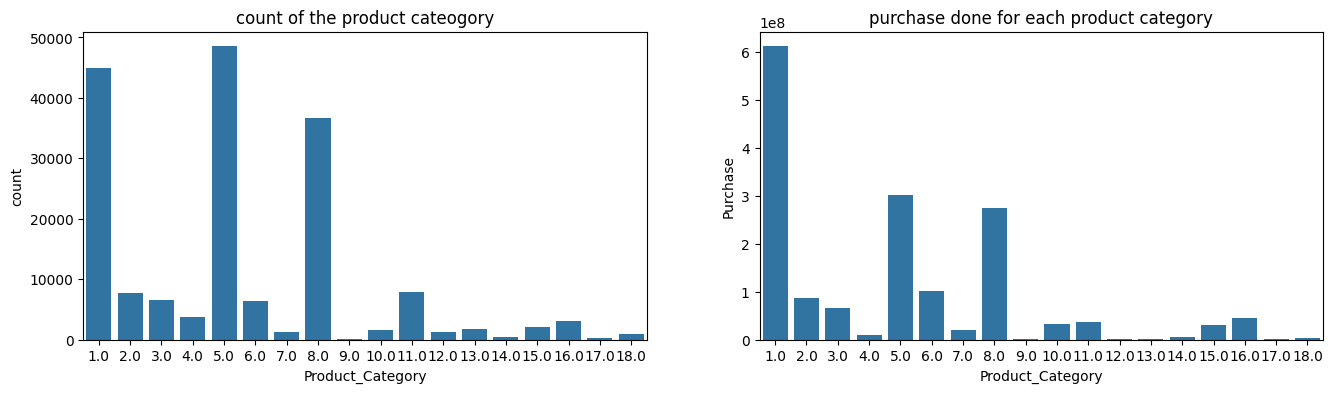

In [ ]:
plt.figure(figsize = (16,4))

plt.subplot(1,2,1)
plt.title("count of the product cateogory")
sns.countplot(data = df, x = 'Product_Category')

grouped_purchase_prod = df.groupby(['Product_Category'])['Purchase'].sum().reset_index()

plt.subplot(1,2,2)
plt.title("purchase done for each product category")
sns.barplot(data = grouped_purchase_prod, x = 'Product_Category', y = 'Purchase')

plt.show()

## Bivariate analysis

In [ ]:
## writing a function to do box plot for various columns in df

def box_col(col1:str):
    plt.figure(figsize = (10,4))
    sns.boxplot(data = df, x = col1, y = df['Purchase'], hue = df['Gender'])
    plt.show()

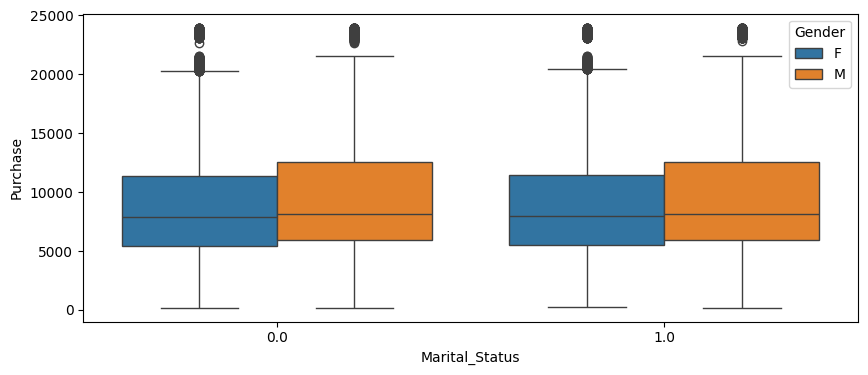

In [ ]:
box_col('Marital_Status')

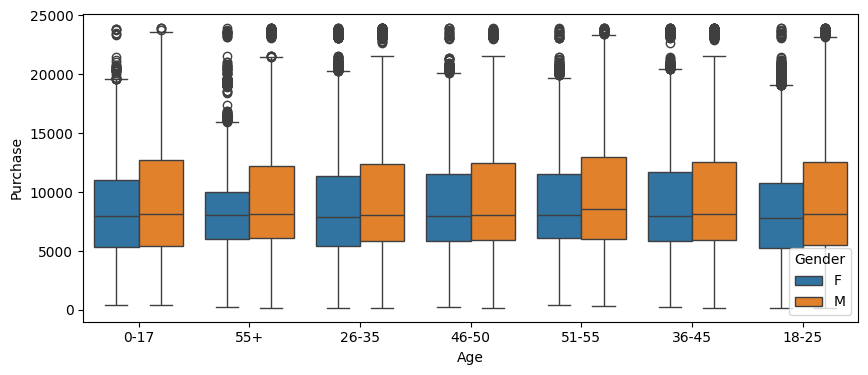

In [ ]:
box_col('Age')

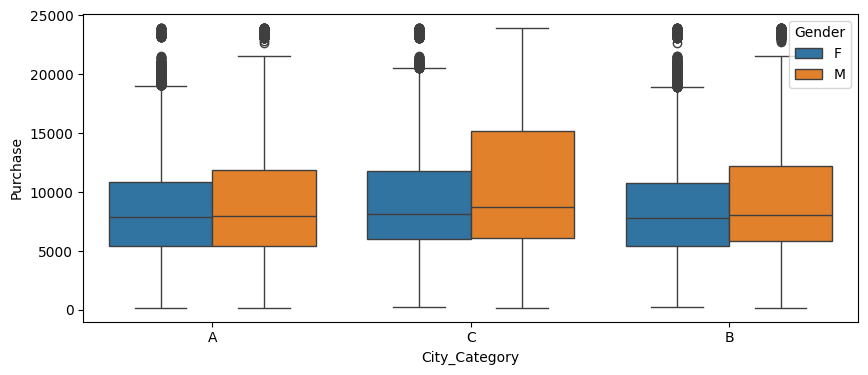

In [ ]:
box_col('City_Category')

In [ ]:
s = 'AEIOU'
for i in s:
    print(i, s.find(i), len(s) - s.find(i))

A 0 5
E 1 4
I 2 3
O 3 2
U 4 1


In [ ]:
s = 'AABCAAADA'
k = len(s)// k
k

3

In [ ]:
[s[:k] for k in range()]

'AAB'

In [ ]:
for i in np.linspace(k, len(s), k):
    print(s[:int(i)])

3.0
AAB
6.0
AABCAA
9.0
AABCAAADA


In [ ]:
for i in range(k, len(s)+1, k):
    print(s[:i])

AAB
AABCAA
AABCAAADA
